In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np


pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('display.precision', 3)

# Read the data

In [3]:
data = pandas.read_csv('resultado.csv', sep=',', na_values=".")
#data=data.drop(labels='Index',axis=1)
print(data[0:5])

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  studytime  failures schoolsup famsup paid activities nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2          2         0       yes     no   no         no     yes    yes       no       no       4         3      4     1     1       3         6   0
1     GP   F   17       U     GT3       T     1     1  at_home     other  course   father           1          2         0        no    yes   no         no      no    yes      yes       no       5         3      3     1     1       3         4   0
2     GP   F   15       U     LE3       T     1     1  at_home     other   other   mother           1          2         3       yes     no  yes         no     yes    yes      yes       no       4         3      2     2     3       3        10   1
3     GP

# Uni-variate description of the data

In [4]:
data.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395,395,395.000,395,395,395,395.000,395.000,395,395,395,395,395.000,395.000,395.000,395,395,395,395,395,395,395,395,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696,NaN,NaN,NaN,2.749,2.522,NaN,NaN,NaN,NaN,1.448,2.035,0.334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944,3.235,3.109,1.481,2.291,3.554,5.709,0.671
std,NaN,NaN,1.276,NaN,NaN,NaN,1.095,1.088,NaN,NaN,NaN,NaN,0.698,0.839,0.744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.897,0.999,1.113,0.891,1.288,1.390,8.003,0.470
min,NaN,NaN,15.000,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,1.000,1.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000
25%,NaN,NaN,16.000,NaN,NaN,NaN,2.000,2.000,NaN,NaN,NaN,NaN,1.000,1.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,3.000,2.000,1.000,1.000,3.000,0.000,0.000
50%,NaN,NaN,17.000,NaN,NaN,NaN,3.000,2.000,NaN,NaN,NaN,NaN,1.000,2.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,3.000,3.000,1.000,2.000,4.000,4.000,1.000
75%,NaN,NaN,18.000,NaN,NaN,NaN,4.000,3.000,NaN,NaN,NaN,NaN,2.000,2.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,4.000,4.000,2.000,3.000,5.000,8.000,1.000


## Boxplots and histograms

Boxplots


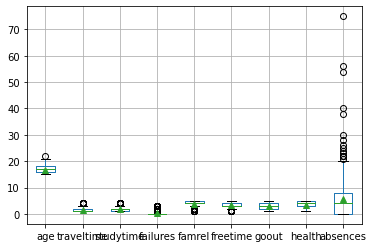

In [5]:
data.boxplot(column=['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

Histograms


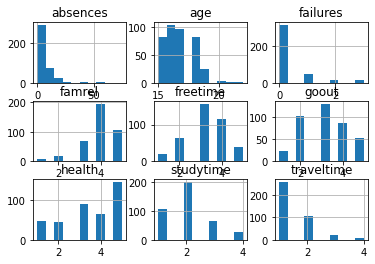

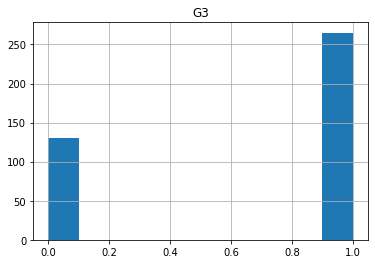

In [13]:
data.hist(column=['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'],  bins=10)
data.hist(column=['G3'])

print("Histograms")

## Identify errors or ouliers - unicariate analysis

In [7]:
data[data.FSIQ>data.FSIQ.mean()+2*data.FSIQ.std()]

AttributeError: 'DataFrame' object has no attribute 'FSIQ'

### Easy solution: remove it (last resource)

In [8]:
new= data.drop(16)
new[data.FSIQ>data.FSIQ.mean()+2*data.FSIQ.std()]

AttributeError: 'DataFrame' object has no attribute 'FSIQ'

KeyError: "None of [Index(['FSIQ', 'VIQ', 'PIQ'], dtype='object')] are in the [columns]"

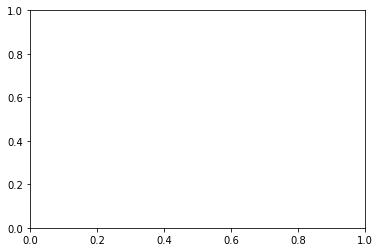

In [9]:
new.boxplot(column=['FSIQ', 'VIQ', 'PIQ'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")
data=new

### Histograms for qualitative data

G3


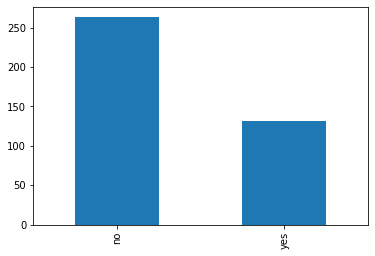

In [11]:
data.romantic.value_counts().plot(kind='bar')
print("G3")

### Univariate analysis depending on label

In [8]:
groupby_gender = data.groupby('sex')
groupby_gender.describe()


age                                                Medu                                          Fedu                                        traveltime                                        studytime                                        failures                                        famrel                                         freetime                                         goout                                          Dalc                                          Walc                                        health                                        absences                                             G3                                       
     count    mean    std   min   25%   50%   75%   max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max      count   mean    std  min  25%  50%  75%  max     count   mean    std  min  25%  50%  75%  max    count   mean    std  min  25%  50%  75%  max  count   mean    std  min   25%  50%  75%  max    count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max    count   mean    std  min  25%  50%  75%   max  count   mean    std  min  25%  50%  75%  max
sex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
F    208.0  16.731  1.202  15.0  16.0  17.0  18.0  20.0  208.0  2.668  1.086  0.0  2.0  3.0  4.0  4.0  208.0  2.486  1.090  1.0  2.0  2.0  3.0  4.0      208.0  1.409  0.646  1.0  1.0  1.0  2.0  4.0     208.0  2.279  0.792  1.0  2.0  2.0  3.0  4.0    208.0  0.303  0.702  0.0  0.0  0.0  0.0  3.0  208.0  3.894  0.895  1.0  3.75  4.0  4.0  5.0    208.0  3.010  0.943  1.0  2.0  3.0  4.0  5.0  208.0  3.029  1.090  1.0  2.0  3.0  4.0  5.0  208.0  1.255  0.596  1.0  1.0  1.0  1.0  5.0  208.0  1.957  1.055  1.0  1.0  2.0  3.0  5.0  208.0  3.365  1.408  1.0  2.0  3.0  5.0  5.0    208.0  6.216  9.446  0.0  0.0  4.0  8.0  75.0  208.0  0.639  0.481  0.0  0.0  1.0  1.0  1.0
M    187.0  16.658  1.356  15.0  16.0  16.0  18.0  22.0  187.0  2.840  1.100  0.0  2.0  3.0  4.0  4.0  187.0  2.561  1.088  0.0  2.0  3.0  3.5  4.0      187.0  1.492  0.750  1.0  1.0  1.0  2.0  4.0     187.0  1.765  0.809  1.0  1.0  2.0  2.0  4.0    187.0  0.369  0.788  0.0  0.0  0.0  0.0  3.0  187.0  4.000  0.898  1.0  4.00  4.0  5.0  5.0    187.0  3.487  1.002  1.0  3.0  3.0  4.0  5.0  187.0  3.198  1.135  1.0  2.0  3.0  4.0  5.0  187.0  1.733  1.079  1.0  1.0  1.0  2.0  5.0  187.0  2.663  1.418  1.0  1.0  3.0  4.0  5.0  187.0  3.765  1.343  1.0  3.0  4.0  5.0  5.0    187.0  5.144  5.981  0.0  0.0  4.0  8.0  38.0  187.0  0.706  0.457  0.0  0.0  1.0  1.0  1.0

Boxplots separated by Gender


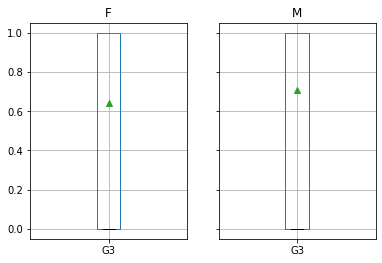

In [64]:
groupby_gender.boxplot(column=['G3'],meanline=False,showmeans=True,return_type='dict')
print('Boxplots separated by Gender')

# Bi-variate analysis

Scatter matrixes for correlations betwen numerical variables 


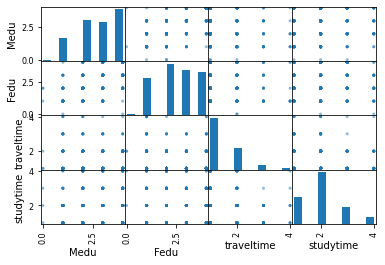

In [18]:
# Scatter matrices for different columns
plotting.scatter_matrix(data[['Medu', 'Fedu','traveltime','studytime']])
#plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numerical variables ')

In [17]:
a=data.corr(method='pearson')
a
#a.to_csv('correlacio.csv', na_rep='NaN')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000,-0.164,-0.163,0.071,-0.004,0.244,0.054,0.016,0.127,0.131,0.117,-0.062,0.175,-0.180
Medu,-0.164,1.000,0.623,-0.172,0.065,-0.237,-0.004,0.031,0.064,0.020,-0.047,-0.047,0.100,0.115
Fedu,-0.163,0.623,1.000,-0.158,-0.009,-0.250,-0.001,-0.013,0.043,0.002,-0.013,0.015,0.024,0.108
traveltime,0.071,-0.172,-0.158,1.000,-0.101,0.092,-0.017,-0.017,0.029,0.138,0.134,0.008,-0.013,-0.044
studytime,-0.004,0.065,-0.009,-0.101,1.000,-0.174,0.040,-0.143,-0.064,-0.196,-0.254,-0.076,-0.063,0.075
failures,0.244,-0.237,-0.250,0.092,-0.174,1.000,-0.044,0.092,0.125,0.136,0.142,0.066,0.064,-0.338
famrel,0.054,-0.004,-0.001,-0.017,0.040,-0.044,1.000,0.151,0.065,-0.078,-0.113,0.094,-0.044,0.047
freetime,0.016,0.031,-0.013,-0.017,-0.143,0.092,0.151,1.000,0.285,0.209,0.148,0.076,-0.058,-0.018
goout,0.127,0.064,0.043,0.029,-0.064,0.125,0.065,0.285,1.000,0.267,0.420,-0.010,0.044,-0.183
Dalc,0.131,0.020,0.002,0.138,-0.196,0.136,-0.078,0.209,0.267,1.000,0.648,0.077,0.112,-0.057


### Finding errors (or outliers) with bi-variate analysis

In [19]:
# Let's do regression between a pari of numeric varaibales
from scipy.optimize import curve_fit
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, data.PIQ,data.FSIQ )
print('a=',params[0][0], 'b=',params[0][1])

# Find errors or outliers
error = data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]
print(np.std(error))
print(error[error>np.mean(error)+2*np.std(error)])

data[data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]==max(data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ])]

AttributeError: 'DataFrame' object has no attribute 'PIQ'

### Solving the error susbtituting current value by predicted value with linear regression 

In [15]:
data.FSIQ.at[8]= fit_func(data['PIQ'][8],params[0][0],params[0][1])
data.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


Scatter matrixes for correlations betwen numeriacal variables 


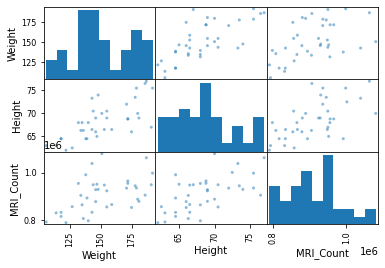

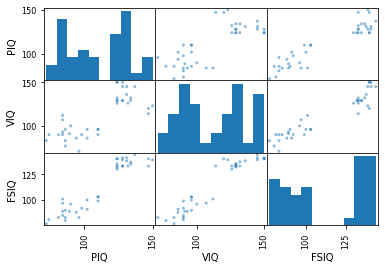

In [16]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numeriacal variables ')

#  Missing data

In [20]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G3            False
dtype: bool

In [22]:
data[data.Weight.isnull()]

AttributeError: 'DataFrame' object has no attribute 'Weight'

In [19]:
data[data.Height.isnull()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
20,Male,83,83,86,NaN,NaN,892420


### Let's solve the case 1 of Weight with regression according to Height because both variables are highly correlated

In [20]:
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, data.Height,data.Weight)
print('a=',params[0][0], 'b=',params[0][1])

ValueError: array must not contain infs or NaNs

### First we have to filter the NaNs

In [15]:
df = data.dropna(axis=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,1
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,1


In [ ]:
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, df.Height,df.Weight)
print('a=',params[0][0], 'b=',params[0][1])

In [ ]:
idx = data.Weight.isnull()
#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))

#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))
print(fit_func(data['Height'][idx],params[0][0],params[0][1]))
data.Weight[idx] = fit_func(data['Height'][idx],params[0][0],params[0][1])

### For the remainding Nas, we will replace the value with the average of the column

In [ ]:
data.fillna(data.mean())